# learn_to_generate_images

The purpose of this notebook is to make images for a
generated TED talk.

## Imports

In [14]:
import requests
import json
from io import BytesIO

from IPython.display import display
from PIL import Image

## Load in the stable diffusion API key

This is loaded from `config.json`, which is expected to have
the format `{'stable_diffusion_key': <key>}`.

In [2]:
with open('config.json') as f:
    stable_diffusion_key = json.load(f)['stable_diffusion_key']

## Functions to support image generation

In [13]:
# Constants

TEXT2IMG_URL = 'https://stablediffusionapi.com/api/v3/text2img'

In [33]:
def ask_for_image_url(prompt, width=512, height=512, num_inference_steps=31):

    # This is saved after each call to assist
    # in debugging.
    global image_to_text_response
    
    req_obj = {
        'key': stable_diffusion_key,
        'prompt': prompt,
        'width': width,
        'height': height,
        'samples': 1,
        'num_inference_steps': num_inference_steps,
    }
    payload = json.dumps(req_obj)

    headers = {
      'Content-Type': 'application/json'
    }

    image_to_text_response = requests.request('POST', url, headers=headers, data=payload)
    text = image_to_text_response.text
    data = json.loads(text)

    return data['output'][0]

In [30]:
def display_image_from_url(url):
    ''' Downloads and displays an image from a given URL. '''
    response = requests.get(url)
    return Image.open(BytesIO(response.content))

## Try a sample

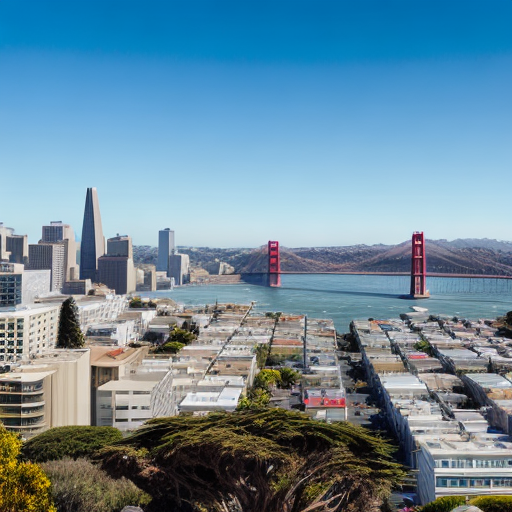

CPU times: user 135 ms, sys: 10.8 ms, total: 146 ms
Wall time: 11.3 s


In [34]:
%%time
img_url = ask_for_image_url('The San Francisco Bay skyline', num_inference_steps=41)
img = display_image_from_url(img_url)
display(img)